In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-us-dot-ridership-and-revenue-urbanized-area/2023 UZA Sums.xlsx
/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.prj
/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.shp
/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.shp.ea.iso.xml
/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.cpg
/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.dbf
/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.shx
/kaggle/input/usa-shapefile-census-2018/cb_2018_us_state_500k.shp.iso.xml
/kaggle/input/us-states-cartographic-boundary-shapefiles/cb_2016_48_cousub_500k.cpg
/kaggle/input/us-states-cartographic-boundary-shapefiles/cb_2016_us_state_500k.dbf
/kaggle/input/us-states-cartographic-boundary-shapefiles/cb_2016_us_state_500k.shx
/kaggle/input/us-states-cartographic-boundary-shapefiles/cb_2016_48_cousub_500k.shp
/kaggle/input/us-states-cartographic-boundary-shapefiles/cb_2016_us_state_500k.shp.xml
/kaggle/input/us

In [2]:
data = pd.read_csv("/kaggle/input/us-monthly-transportation-statistics/Monthly_Transportation_Statistics.csv")

In [3]:
data.describe()

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,U.S. Air Carrier Cargo (millions of revenue ton-miles) - Domestic,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,Transborder - U.S. - Canada Freight
count,884.000000,469.000000,49.000000,37.000000,4.100000e+01,4.100000e+01,4.100000e+01,2.220000e+02,2.220000e+02,2.220000e+02,...,2.120000e+02,642.000000,4.000000e+01,6.420000e+02,4.000000e+01,6.420000e+02,4.000000e+01,1.740000e+02,1.740000e+02,1.740000e+02
mean,441.500000,65.522388,1.137347,8624.783784,6.961585e+07,8.684878e+06,6.093146e+07,1.532705e+07,4.203466e+08,3.642521e+08,...,1.186232e+09,354003.115265,7.114575e+07,5.723495e+06,8.897250e+06,8.474963e+06,6.224875e+07,8.709537e+10,3.922149e+10,4.787387e+10
std,255.333116,45.785570,0.077749,964.936761,1.698202e+07,2.365921e+06,1.469929e+07,2.678615e+06,4.840298e+07,5.919175e+07,...,1.575511e+08,91538.743950,1.404846e+07,3.065362e+06,1.960744e+06,1.773940e+06,1.219181e+07,1.317668e+10,8.713840e+09,5.702295e+09
min,0.000000,1.000000,0.980000,6726.000000,3.010000e+06,1.300000e+05,2.880000e+06,4.666471e+06,9.353595e+07,4.245816e+07,...,8.532682e+08,159000.000000,3.010000e+06,9.880000e+05,1.300000e+05,1.974000e+06,2.880000e+06,5.426452e+10,2.164871e+10,2.976629e+10
25%,220.750000,38.000000,1.090000,8154.000000,6.781000e+07,8.080000e+06,5.985000e+07,1.323445e+07,4.058366e+08,3.428067e+08,...,1.057643e+09,293000.000000,6.847750e+07,2.994000e+06,8.192500e+06,7.521250e+06,6.031500e+07,7.882225e+10,3.119769e+10,4.496029e+10
50%,441.500000,55.000000,1.140000,8799.000000,7.296000e+07,9.000000e+06,6.456000e+07,1.568738e+07,4.263636e+08,3.793065e+08,...,1.177373e+09,345500.000000,7.301500e+07,5.064000e+06,9.035000e+06,8.430500e+06,6.459500e+07,9.006379e+10,4.095288e+10,4.873421e+10
75%,662.250000,81.000000,1.180000,9290.000000,7.862000e+07,9.980000e+06,6.858000e+07,1.726534e+07,4.453415e+08,4.032538e+08,...,1.317168e+09,411000.000000,7.879000e+07,8.323000e+06,9.980000e+06,9.708000e+06,6.886500e+07,9.640523e+10,4.526377e+10,5.198998e+10
max,883.000000,345.000000,1.330000,10081.000000,8.696000e+07,1.167000e+07,7.528000e+07,2.070680e+07,5.155401e+08,4.547436e+08,...,1.583861e+09,563000.000000,8.696000e+07,1.258900e+07,1.167000e+07,1.505100e+07,7.528000e+07,1.107956e+11,5.658084e+10,5.857472e+10


## Question: How do you know when and where to build public trains (Mass Rapid Transit)?

### Question: When is the 'break-even' point for cost/benefit of installing trains?

### What makes high public transit use?

- *Connectivity:* What kinds of trips are best served by rapid transit?

#### Where is monthly & annual ridership *highest* on public transit across US? What are the characteristics of a place with high ridership? 

- Ex. Proximity to high population density; Proximity to commercial / retail density; Amount of road lanes;

#### Car-centric vs. transit-centric design? 
- Research aspects of car-centric and public transit-centric design to understand what components to look for. 

#### Where is monthly & annual train ridership highest in the world? What are the characteristics of places with high train use?

#### What is the cost of trains?

#### What are the benefits of trains?
- Less traffic -> less noise; pollution; faster emergency vehicle response times; healthier population (walking); fewer car crashes; fewer traffic fatalities; increased space for walkable plazas and surface parks (reclaim road space / reduce expansion);
- \# of vehicle trips saved.

##### TODO: Perform analysis of benefit of public transit. 

# Initialize and Refresh Data
This section exists for debugging purposes, so that the plotting sections don't need to be run to refresh and reset all tables. 

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
pd.set_option('display.max_columns', None)
counties = gpd.read_file("/kaggle/input/cb-2018-us-county-500k-zip")
states = gpd.read_file("/kaggle/input/usa-shapefile-census-2018")
counties=counties.to_crs("ESRI:102003")
states=states.to_crs("ESRI:102003")
riders = pd.read_excel("/kaggle/input/us-dot-october-2024-complete-monthly-ridership/October 2024 Complete Monthly Ridership (with adjustments and estimates)_241202.xlsx",sheet_name="Master")
cities = gpd.read_file("/kaggle/input/us-census-2020-urban-areas-2023/")
cities=cities.astype({"UACE20":'int',"GEOID20":"int","ALAND20":"float","AWATER20":"float","INTPTLAT20":"float","INTPTLON20":"float"})
cities=cities.to_crs("ESRI:102003")
riders_map=cities.set_index('UACE20').join(riders.set_index('UACE CD'))
riders_map["3 Mode"]=riders_map["3 Mode"].replace({np.nan : "None"})
rail_cities = riders_map[riders_map["3 Mode"]=="Rail"]


# Part I: Where the Trains Are

#### Goal: Heatmap of Trains, Pop Density, and transit rating(?). 




In [6]:
counties = gpd.read_file("/kaggle/input/cb-2018-us-county-500k-zip")
states = gpd.read_file("/kaggle/input/usa-shapefile-census-2018")


In [7]:
counties.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3233 non-null   object  
 1   COUNTYFP  3233 non-null   object  
 2   COUNTYNS  3233 non-null   object  
 3   AFFGEOID  3233 non-null   object  
 4   GEOID     3233 non-null   object  
 5   NAME      3233 non-null   object  
 6   LSAD      3233 non-null   object  
 7   ALAND     3233 non-null   int64   
 8   AWATER    3233 non-null   int64   
 9   geometry  3233 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 252.7+ KB


In [8]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


<Axes: >

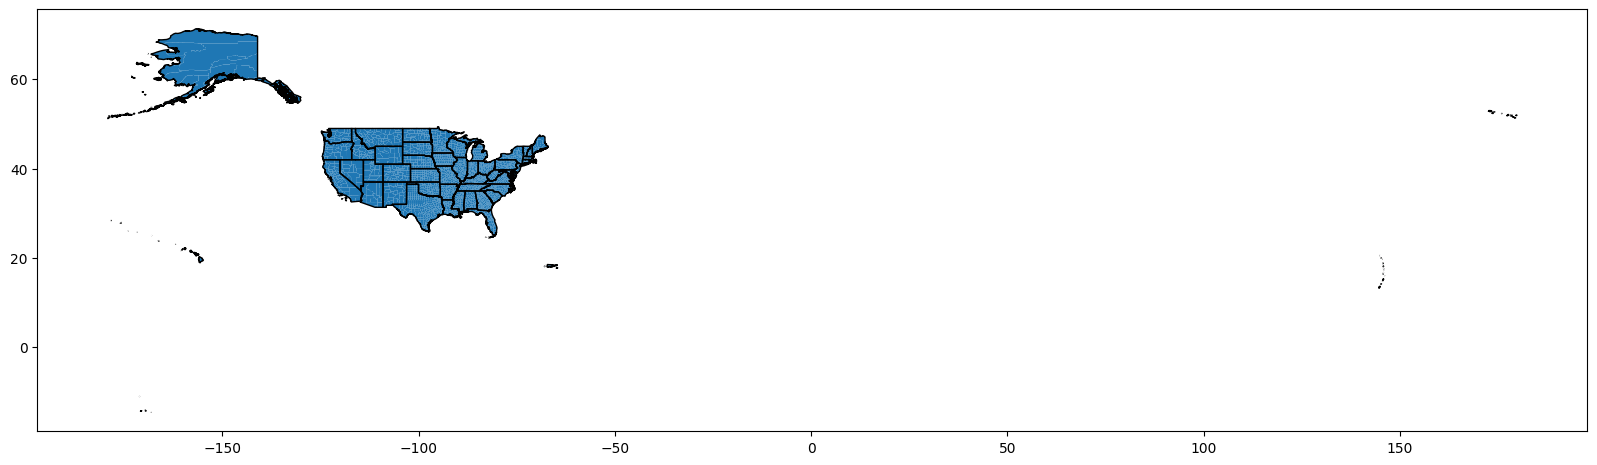

In [9]:
ax = counties.plot(figsize=(20,20))
states.plot(ax=ax,figsize=(20,20),color="None")

In [10]:
counties=counties.to_crs("ESRI:102003")
states=states.to_crs("ESRI:102003")

<Axes: >

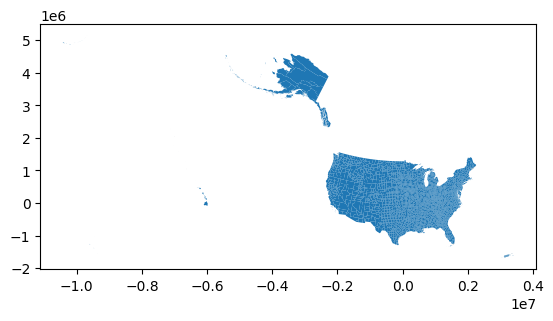

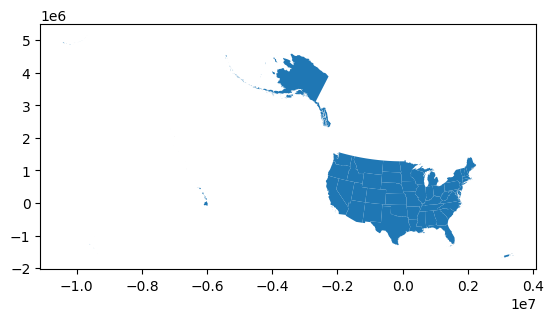

In [11]:

counties.plot()
states.plot()

In [12]:
counties.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   3233 non-null   object  
 1   COUNTYFP  3233 non-null   object  
 2   COUNTYNS  3233 non-null   object  
 3   AFFGEOID  3233 non-null   object  
 4   GEOID     3233 non-null   object  
 5   NAME      3233 non-null   object  
 6   LSAD      3233 non-null   object  
 7   ALAND     3233 non-null   int64   
 8   AWATER    3233 non-null   int64   
 9   geometry  3233 non-null   geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 252.7+ KB


#### Need to figure out a way to join the counties with county-data. Name, perhaps?

<Axes: >

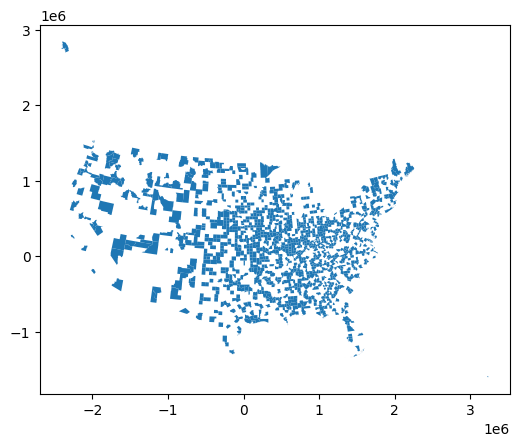

In [13]:
counties[counties["NAME"].duplicated()].plot()

#### Names are not unique. However, documentation from the Census Bureau shows that our data contains codes that can be used with other census data. 

>TIGER/Line Shapefiles do not include demographic data, but they do contain geographic entity codes (GEOIDs) that can be linked to the Census Bureau’s demographic data
> https://www.census.gov/geographies/mapping-files.2024.List_27529751.html#list-tab-List_27529751

#### Now, to find data to use with our GEOIDs! 

### Data Sources Available:

https://www.statista.com/topics/9226/public-transit-in-the-united-states/#editorsPicks

##### Census.gov Commuters survey (Work trips)

Individual city ridership statistics
- NYC

##### National Transit Database: https://www.transit.dot.gov/ntd

### Metrics:

#### "Unlinked Trips" == # of Rides



>  Passenger boardings are called unlinked and linked passenger trips. Unlinked trips are total boardings on an individual vehicle. Linked trips refers to the total number of riders and measures the actual number of complete trips from origin to destination, including transfers. Unlinked trips are viewed as a measure of transit utilization (at the system, route, or subroute level), while linked trips are used to measure revenue passengers.
> https://www.bts.gov/archive/publications/transportation_statistics_annual_report/2003/chapter_02/chapter_02_box_page_72



### Ridership vs. Population

In [14]:
riders.describe()

,NTD ID,UACE CD,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
count,2301.000000,2295.000000,2295.000000,2.295000e+03,2.251000e+03,2251.000000,2282.000000,2282.000000,2282.000000,1.900000e+03,1.900000e+03,1900.000000,1.905000e+03,1.919000e+03,1900.000000,1900.000000
mean,48723.374185,50261.061002,636.217704,2.647791e+06,8.972714e+05,771.064416,2019.963628,8.189308,2019.964943,2.160675e+07,3.993882e+06,11.686078,5.943276e+06,3.204388e+07,31.276385,3.188675
std,26973.619595,28619.295060,840.358589,4.632210e+06,1.618150e+06,3524.301914,5.549268,2.651645,5.544891,2.030711e+08,4.932242e+07,14.952686,6.800011e+07,1.908122e+08,44.012687,11.945548
min,1.000000,17.000000,0.000000,5.072000e+04,0.000000e+00,0.000000,1994.000000,2.000000,1994.000000,0.000000e+00,7.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,30054.000000,23527.000000,76.010000,1.690440e+05,1.322590e+05,65.000000,2019.000000,6.000000,2019.000000,2.513480e+05,3.661725e+04,4.000000,3.138900e+04,8.644690e+05,8.548143,0.644512
50%,50017.000000,52390.000000,260.290000,5.614560e+05,3.077500e+05,237.000000,2023.000000,6.000000,2023.000000,1.373568e+06,1.608090e+05,6.450650,2.394830e+05,3.512952e+06,18.705294,1.414416
75%,70005.000000,75650.500000,752.280000,2.914866e+06,9.101440e+05,616.000000,2023.000000,12.000000,2023.000000,6.611935e+06,9.062568e+05,11.925884,1.248948e+06,1.276984e+07,42.127581,3.279338
max,99425.000000,99999.000000,3248.120000,1.942645e+07,1.163811e+07,121697.000000,2023.000000,12.000000,2023.000000,8.001949e+09,2.017882e+09,286.552893,2.703908e+09,6.047954e+09,929.861111,428.344007


In [15]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NTD ID                       2301 non-null   int64  
 1   Legacy NTD ID                2215 non-null   object 
 2   Agency                       2301 non-null   object 
 3   Mode                         2301 non-null   object 
 4   TOS                          2301 non-null   object 
 5   3 Mode                       2301 non-null   object 
 6   Mode/Type of Service Status  2301 non-null   object 
 7   Reporter Type                2301 non-null   object 
 8   Organization Type            2301 non-null   object 
 9   HQ City                      2294 non-null   object 
 10  HQ State                     2301 non-null   object 
 11  UACE CD                      2295 non-null   float64
 12  UZA Name                     2295 non-null   object 
 13  UZA SQ Miles      

In [16]:
pd.set_option('display.max_columns', None)
# Prevent pandas from cutting off more than 20 columns.

In [17]:
riders[(riders['Mode/Type of Service Status']!="Inactive")].groupby("Agency").agg({'unique'}).head()

,NTD ID,Legacy NTD ID,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,HQ State,UACE CD,UZA Name,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique
Agency,,,,,,,,,,,,,,,,,,,,,,,,,,
"Academy Lines, Inc.",[20122],[2122],[CB],[DO],[Bus],[Active],[Full Reporter],[Private-For-Profit Corporation],[HOBOKEN],[NJ],[63217.0],"[New York--Jersey City--Newark, NY--NJ]",[3248.12],[19426449.0],[1455245.0],[468.0],[2023.0],[12.0],[2023.0],[44972754.0],[1064165.0],[42.2610722961195],[15884111.0],[18990515.0],[17.8454609952404],[14.9263610436352]
Access Services,[90157],[9157],[DR],"[PT, TX]",[Bus],[Active],[Full Reporter],[Independent Public Agency or Authority of Tra...,[EL MONTE],[CA],[51445.0],"[Los Angeles--Long Beach--Anaheim, CA]",[1636.83],[12237376.0],[11638106.0],[1621.0],[2023.0],[6.0],[2023.0],"[30765125.0, 11975974.0]","[2620087.0, 925287.0]","[11.7420242152264, 12.9429830960556]","[6039648.0, 2228490.0]","[152396246.0, 53879933.0]","[58.1645746877871, 58.2305090204445]","[2.30513261582535, 2.40843111380577]"
Ada County Highway District,[415],[nan],[VP],[DO],[Bus],[Active],[Full Reporter],"[City, County or Local Government Unit or Depa...",[Boise],[ID],[8785.0],"[Boise City, ID]",[139.23],[433180.0],[813042.0],[252.0],[2023.0],[9.0],[2023.0],[5076885.0],[130715.0],[38.8393451401905],[979599.0],[1241488.0],[9.49767050453276],[7.49415904831121]
"Adirondack Transit Lines, Inc.",[20177],[2177],[CB],[DO],[Bus],[Active],[Full Reporter],[Private-For-Profit Corporation],[HURLEY],[NY],[63217.0],"[New York--Jersey City--Newark, NY--NJ]",[3248.12],[19426449.0],[9428015.0],[10702.0],[2023.0],[12.0],[2023.0],[31065245.0],[362745.0],[85.6393471998236],[8583815.0],[12417320.0],[34.2315400625784],[23.6634963955396]
Alameda-Contra Costa Transit District,[90014],[9014],"[CB, DR, MB, RB]","[DO, PT]",[Bus],[Active],[Full Reporter],[Independent Public Agency or Authority of Tra...,[OAKLAND],[CA],[78904.0],"[San Francisco--Oakland, CA]",[513.8],[3515933.0],[1586454.0],[364.0],[2023.0],[6.0],[2023.0],"[5755634.0, 3921587.0, 100265061.0, 2083835.0,...","[467661.0, 419288.0, 30029858.0, 167120.0, 410...","[12.3072781352304, 9.35296741142127, 3.3388456...","[2057713.0, 1628832.0, 37018769.0, 355082.0, 1...","[8634025.0, 44057385.0, 454197000.0, 3568738.0...","[18.4621445876393, 105.076665680869, 15.124846...","[4.40000983618476, 3.88475701665681, 1.2327320..."


In [18]:

riders
riders[(riders['Mode/Type of Service Status']!="Inactive") & (riders['3 Mode']!="Bus")].groupby("Agency").agg({'unique'}).head()


,NTD ID,Legacy NTD ID,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,HQ State,UACE CD,UZA Name,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique,unique
Agency,,,,,,,,,,,,,,,,,,,,,,,,,,
Alaska Railroad Corporation,[41],[0041],[AR],[DO],[Rail],[Active],[Full Reporter],[State Government Unit or Department of Transp...,[ANCHORAGE],[AK],[2305.0],"[Anchorage, AK]",[91.69],[249252.0],[352701.0],[266.0],[2023.0],[12.0],[2023.0],[27930710.0],[225434.0],[123.89750436935],[36125687.0],[60628460.0],[268.941064790582],[160.249505398476]
Altamont Corridor Express,[90182],[9182],[CR],[PT],[Rail],[Active],[Full Reporter],[Independent Public Agency or Authority of Tra...,[STOCKTON],[CA],[85087.0],"[Stockton, CA]",[92.46],[414847.0],[4393972.0],[28.0],[2023.0],[6.0],[2023.0],[24448921.0],[474498.0],[51.5258673376916],[3829286.0],[36150511.0],[76.1868564251061],[8.07018364671716]
Alternativa de Transporte Integrado,[40094],[4094],[HR],[PT],[Rail],[Active],[Full Reporter],[State Government Unit or Department of Transp...,[SAN JUAN],[PR],[79093.0],"[San Juan, PR]",[763.6],[1844410.0],[701366.0],[149.0],[2023.0],[6.0],[2023.0],[12125868.0],[2733251.0],[4.4364268045635],[3896340.0],[72143183.0],[26.3946424971581],[1.42553318374346]
Barnegat Bay Decoy & Baymen's Museum,[20230],[nan],[FB],[DO],[Ferry],[Active],[Full Reporter],[Private-Non-Profit Corporation],[Tuckerton],[NJ],[63217.0],"[New York--Jersey City--Newark, NY--NJ]",[3248.12],[19426449.0],[24296.0],[3104.0],[2023.0],[12.0],[2023.0],[60214.0],[7343.0],[8.2001906577693],[32633.0],[906703.0],[123.478551000953],[4.44409641835762]
Bay State LLC,[11238],[nan],[FB],[DO],[Ferry],[Active],[Full Reporter],[Private-For-Profit Corporation],[Boston],[MA],[9271.0],"[Boston, MA--NH]",[1655.89],[4382009.0],[221049.0],[277.0],[2022.0],[12.0],[2022.0],[5318885.0],[96707.0],[55.0],[6287351.0],[4672351.0],[48.3145067058227],[65.0144353562824]


### Now, I would like to see these riderships on the map... How to assign geographic areas?

#### "UZA" (Urbanized Areas) file contains an ID number that aligns an Urbanized Area (eg. City) with a Census ID -- "UACE CD". 

Now we need to make sure that our UACE codes have geographic map geometry.

In [19]:
sums = pd.read_excel("/kaggle/input/2023-us-dot-ridership-and-revenue-urbanized-area/2023 UZA Sums.xlsx")
sums[sums["UZA Population"].notnull()].head()

,UACE CD,UZA Name,UZA Population,Total Vehicle Revenue Miles,Total Vehicle Revenue Hours,Total Passenger Miles Traveled,Total Unlinked Passenger Trips,Total Operating Expenses,Fixed Guideway Directional Route Miles,Fixed Guideway Vehicle Revenue Miles,Fixed Guideway Passenger Miles,Fixed Guideway Operating Expenses,Non-Fixed Guideway Vehicle Revenue Miles,Non-Fixed Guideway Passenger Miles,Non-Fixed Guideway Operating Expenses,Fixed Guideway Directional Route Miles >= 7 Years,Fixed Guideway Vehicle Revenue Miles >= 7 Years,High Intensity Bus Directional Route Miles >= 7 Years,High Intensity Bus Vehicle Revenue Miles >= 7 Years
55,280,"Abilene, TX",118138.0,761280,55000,0,345382,5672339,0.0,0,0,0,761280,0,5672339,0.0,0,0.0,0
56,631,"Aguadilla--Isabela--San Sebastián, PR",232573.0,465200,46665,424185,185503,811607,0.0,0,0,0,465200,424185,811607,0.0,0,0.0,0
57,766,"Akron, OH",541879.0,6426787,476747,20738664,5178561,64874147,0.0,0,0,0,6426787,20738664,64874147,0.0,0,0.0,0
58,901,"Albany, GA",85960.0,419461,24927,1501671,273626,4321784,0.0,0,0,0,419461,1501671,4321784,0.0,0,0.0,0
59,955,"Albany, OR",62074.0,185263,12637,0,52162,1623931,0.0,0,0,0,185263,0,1623931,0.0,0,0.0,0


In [20]:
cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   UACE20      2644 non-null   int64   
 1   GEOID20     2644 non-null   int64   
 2   GEOIDFQ20   2644 non-null   object  
 3   NAME20      2644 non-null   object  
 4   NAMELSAD20  2644 non-null   object  
 5   LSAD20      2644 non-null   object  
 6   MTFCC20     2644 non-null   object  
 7   FUNCSTAT20  2644 non-null   object  
 8   ALAND20     2644 non-null   float64 
 9   AWATER20    2644 non-null   float64 
 10  INTPTLAT20  2644 non-null   float64 
 11  INTPTLON20  2644 non-null   float64 
 12  geometry    2644 non-null   geometry
dtypes: float64(4), geometry(1), int64(2), object(6)
memory usage: 268.7+ KB


In [21]:
cities=cities.astype({"UACE20":'int',"GEOID20":"int","ALAND20":"float","AWATER20":"float","INTPTLAT20":"float","INTPTLON20":"float"})


<Axes: >

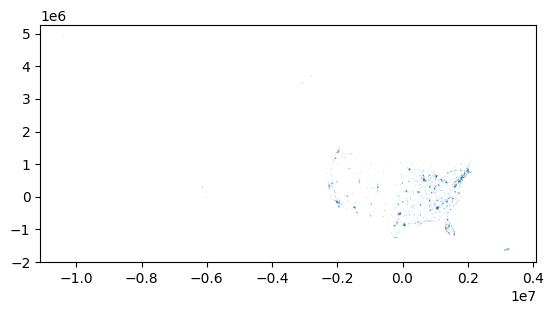

In [22]:
cities=cities.to_crs("ESRI:102003")
cities.plot()

(-7000000.0, 4000000.0)

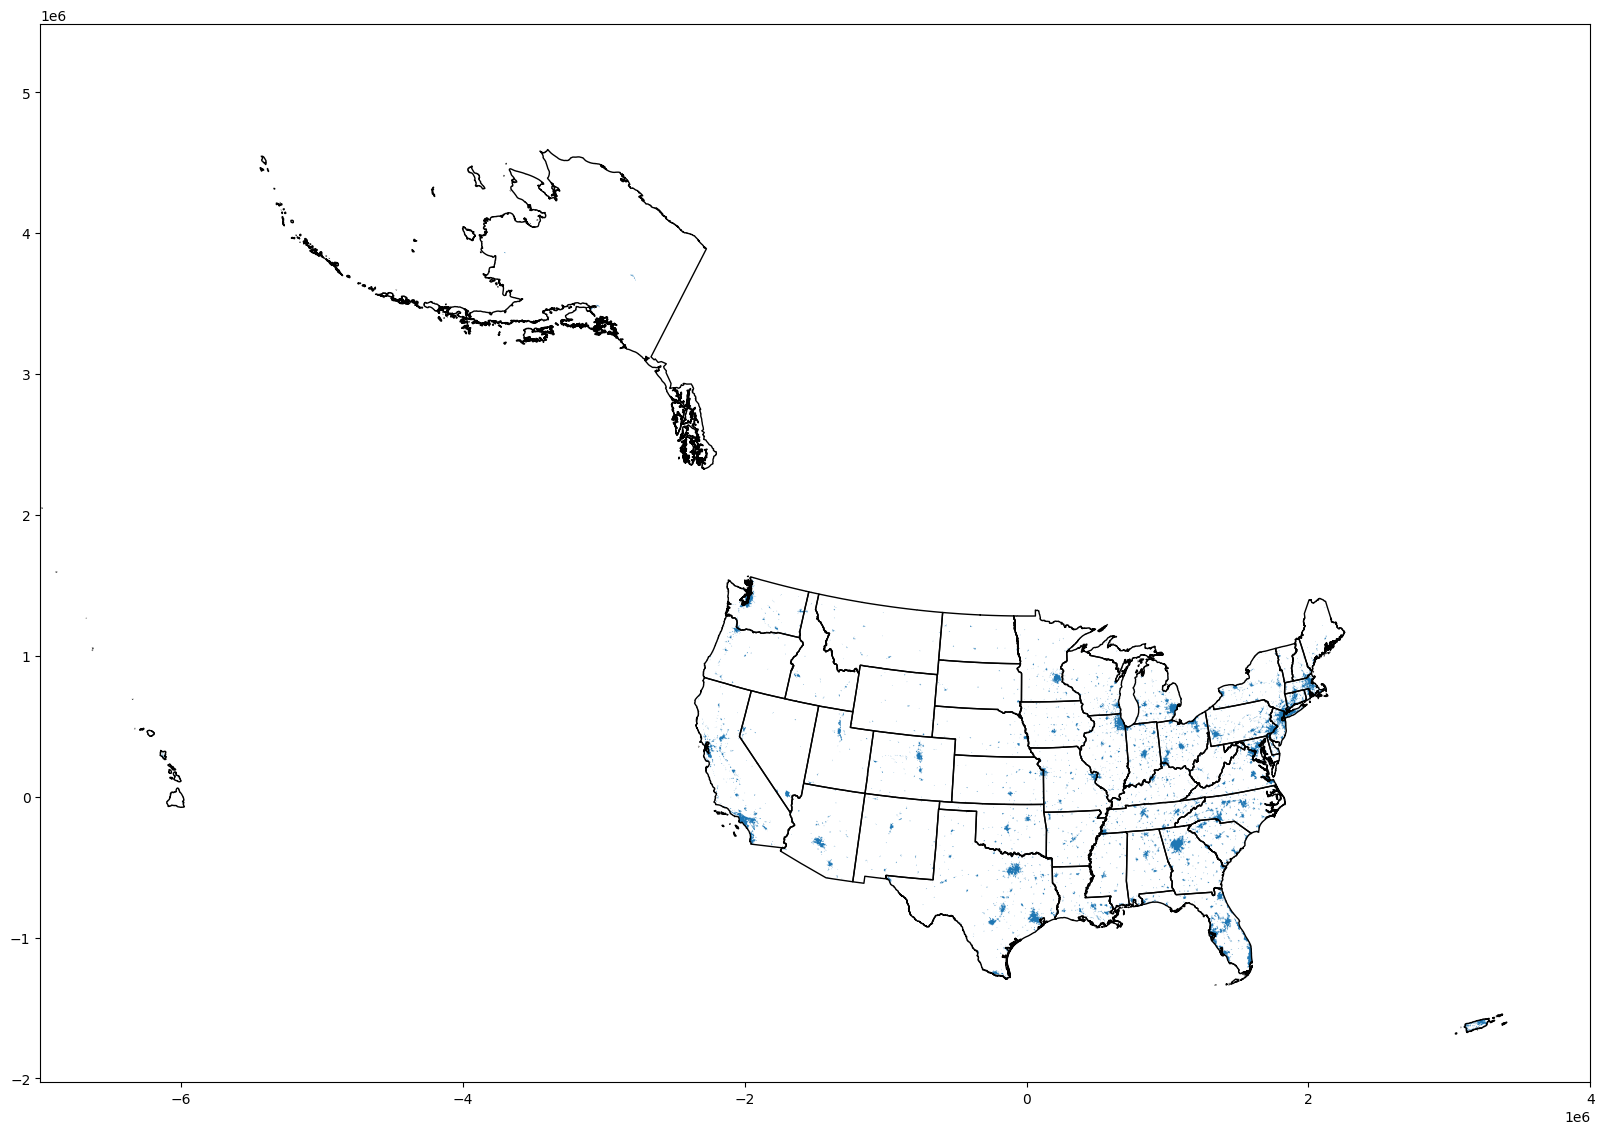

In [23]:
ax=cities.plot(figsize=(20,20))
states.plot(figsize=(20,20),ax=ax,color="None")
ax.set_xlim(-0.7e7,0.4e7)


### Need to show ridership on top of cities, and need the ridership color-coding to be visible. 

Show dot sizes? IE, Proportional Symbol Map.

In [24]:
riders_map.head()

,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NTD ID,Legacy NTD ID,Agency,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,HQ State,UZA Name,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
UACE20,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37.0,37,400C200US00037,"Abbeville, LA","Abbeville, LA Urban Area",67,G3500,S,28651258.0,508378.0,29.968650,-92.095225,"MULTIPOLYGON (((375811.583 -833245.908, 375440...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64.0,64,400C200US00064,"Abbeville, SC","Abbeville, SC Urban Area",67,G3500,S,12815034.0,6144.0,34.176729,-82.382945,"POLYGON ((1243986.156 -283506.601, 1243967.070...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145.0,145,400C200US00145,"Aberdeen, SD","Aberdeen, SD Urban Area",67,G3500,S,35989074.0,183150.0,45.463204,-98.468811,"MULTIPOLYGON (((-196279.069 894927.697, -19627...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172.0,172,400C200US00172,"Aberdeen, WA","Aberdeen, WA Urban Area",67,G3500,S,28416190.0,1802207.0,46.974595,-123.831816,"POLYGON ((-2095135.191 1369084.735, -2095131.4...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253.0,253,400C200US00253,"Abilene, KS","Abilene, KS Urban Area",67,G3500,S,9426822.0,1877.0,38.921060,-97.220754,"POLYGON ((-104538.875 158182.337, -104525.904 ...",NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Prepare to plot the ridership data on the map!

Note that the Head data shows a lot of NaN values for our Dept of Transportation data ("UZA" data). I'm assuming that those are areas with no public transit. We will filter those out.

I'd like to see what the map looks like with highlighting the areas with no public transit vs areas with public transit. 

Will we be able to see the areas with no public transit if the fill area is so small? Can we change the line color for those areas?

In [25]:
riders_map["3 Mode"]=riders_map["3 Mode"].replace({np.nan : "None"})
riders_map["3 Mode"].unique()

array(['None', 'Bus', 'Rail', 'Ferry', 'Other'], dtype=object)

(-7000000.0, 4000000.0)

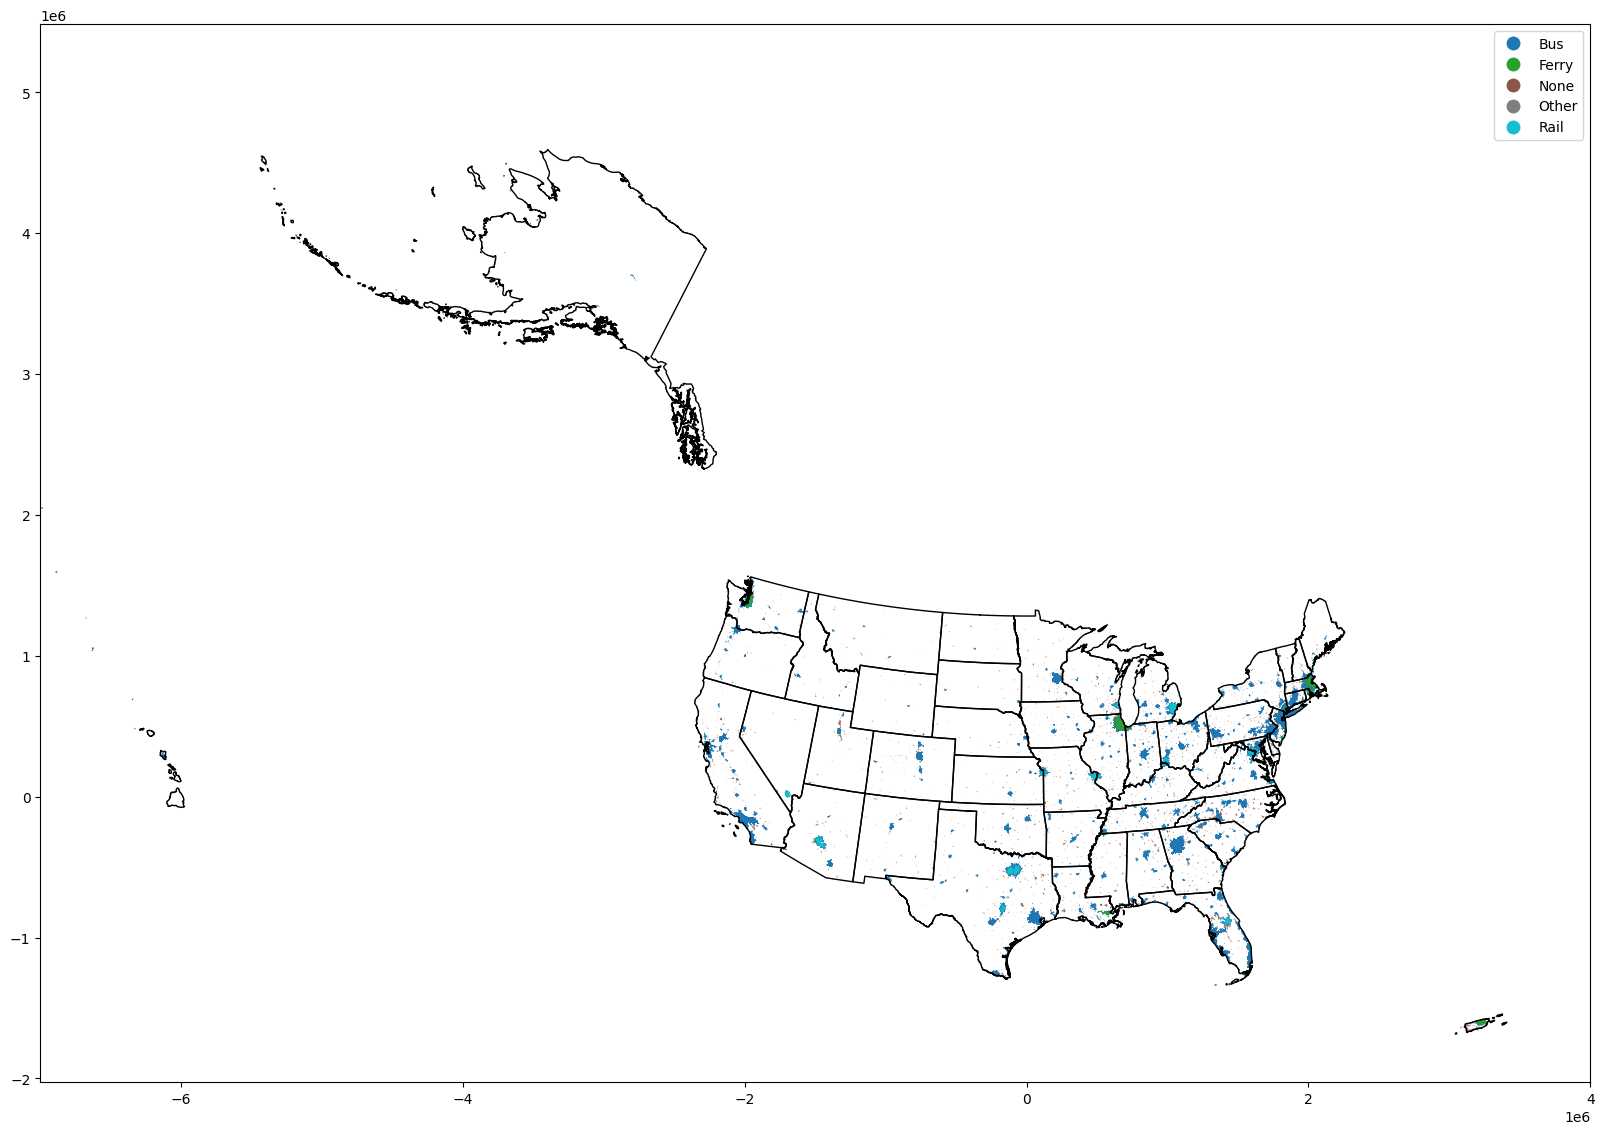

In [26]:
ax=riders_map.plot(figsize=(20,20), column="3 Mode",edgecolor="None", legend=True, rasterized=True)
states.plot(ax=ax,color="None")
ax.set_xlim(-7e6,4e6)

I'm curious whether there are high-population areas with no public transit, and whether there are relatively low-population areas that do have public transit.

In [27]:
riders_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4526 entries, 37.0 to 98209.0
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   GEOID20                      4526 non-null   int64   
 1   GEOIDFQ20                    4526 non-null   object  
 2   NAME20                       4526 non-null   object  
 3   NAMELSAD20                   4526 non-null   object  
 4   LSAD20                       4526 non-null   object  
 5   MTFCC20                      4526 non-null   object  
 6   FUNCSTAT20                   4526 non-null   object  
 7   ALAND20                      4526 non-null   float64 
 8   AWATER20                     4526 non-null   float64 
 9   INTPTLAT20                   4526 non-null   float64 
 10  INTPTLON20                   4526 non-null   float64 
 11  geometry                     4526 non-null   geometry
 12  NTD ID                       2264 non-null   float64 

<Axes: xlabel='3 Mode'>

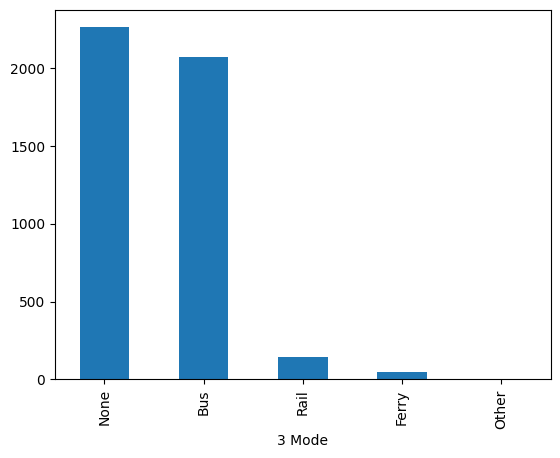

In [28]:
riders_map["3 Mode"].value_counts().plot(kind="bar")

In [29]:
riders_map["NAME20"].astype(str)

UACE20
37.0            Abbeville, LA
64.0            Abbeville, SC
145.0            Aberdeen, SD
172.0            Aberdeen, WA
253.0             Abilene, KS
                  ...        
98074.0        Zanesville, OH
98101.0    Zapata--Medina, TX
98129.0           Zebulon, NC
98182.0       Zephyrhills, FL
98209.0         Zimmerman, MN
Name: NAME20, Length: 4526, dtype: object

In [30]:
# Check for NaN values
print(riders_map["UZA Population"].isna().sum())  # Count of missing values

riders_map_nonan= riders_map.dropna(subset=["UZA Population"])

print(riders_map_nonan.shape) 

# Check for infinite values
import numpy as np
print(np.isinf(riders_map["UZA Population"]).sum())  # Count of infinite values

2262
(2264, 38)
0


<Axes: >

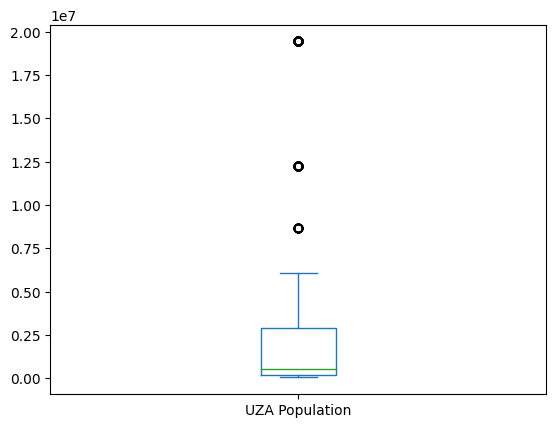

In [31]:
riders_map["UZA Population"].plot(kind="box")

In [32]:
riders_map[riders_map["UZA Population"]>7.5e6]

,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NTD ID,Legacy NTD ID,Agency,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,HQ State,UZA Name,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
UACE20,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50042.0,5042,City of East Chicago,DR,DO,Bus,Active,Small Systems Reporter,"City, County or Local Government Unit or Depar...",EAST CHICAGO,IN,"Chicago, IL--IN",2337.89,8671746.0,26370.0,11.0,2023.0,12.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50042.0,5042,City of East Chicago,MB,DO,Bus,Active,Small Systems Reporter,"City, County or Local Government Unit or Depar...",EAST CHICAGO,IN,"Chicago, IL--IN",2337.89,8671746.0,26370.0,11.0,2023.0,12.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50045.0,5045,Gary Public Transportation Corporation,DR,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,GARY,IN,"Chicago, IL--IN",2337.89,8671746.0,102746.0,38.0,2023.0,12.0,2023.0,85249.0,13360.0,6.380913,31226.0,720548.0,53.933234,2.337275
16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50045.0,5045,Gary Public Transportation Corporation,MB,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,GARY,IN,"Chicago, IL--IN",2337.89,8671746.0,102746.0,38.0,2023.0,12.0,2023.0,859597.0,447129.0,1.922481,328285.0,7575458.0,16.942444,0.734206
16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50048.0,5048,Northwest Indiana Community Action Corporation,DR,DO,Bus,Inactive,Full Reporter,Public agency or authority that directly opera...,Crown Point,IN,"Chicago, IL--IN",2337.89,8671746.0,848604.0,919.0,2009.0,12.0,2009.0,46797.0,2485.0,18.831791,3253.0,125526.0,50.513481,1.309054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63217.0,63217,400C200US63217,"New York--Jersey City--Newark, NY--NJ","New York--Jersey City--Newark, NY--NJ Urban Area",67,G3500,S,8.412185e+09,548654144.0,40.712152,-73.950184,"MULTIPOLYGON (((1832318.159 546405.031, 183268...",20230.0,NaN,Barnegat Bay Decoy & Baymen's Museum,FB,DO,Ferry,Active,Full Reporter,Private-Non-Profit Corporation,Tuckerton,NJ,"New York--Jersey City--Newark, NY--NJ",3248.12,19426449.0,24296.0,3104.0,2023.0,12.0,2023.0,60214.0,7343.0,8.200191,32633.0,906703.0,123.478551,4.444096
63217.0,63217,400C200US63217,"New York--Jersey City--Newark, NY--NJ","New York--Jersey City--Newark, NY--NJ Urban Area",67,G3500,S,8.412185e+09,548654144.0,40.712152,-73.950184,"MULTIPOLYGON (((1832318.159 546405.031, 183268...",22930.0,NaN,New York City Economic Development Corporation,FB,PT,Ferry,Active,Full Reporter,Private-Non-Profit Corporation,NEW YORK,NY,"New York--Jersey City--Newark, NY--NJ",3248.12,19426449.0,576545.0,13.0,2023.0,6.0,2023.0,33254457.0,6593142.0,5.043795,19772375.0,69130114.0,10.485155,2.998931
6

<Axes: ylabel='UZA Population'>

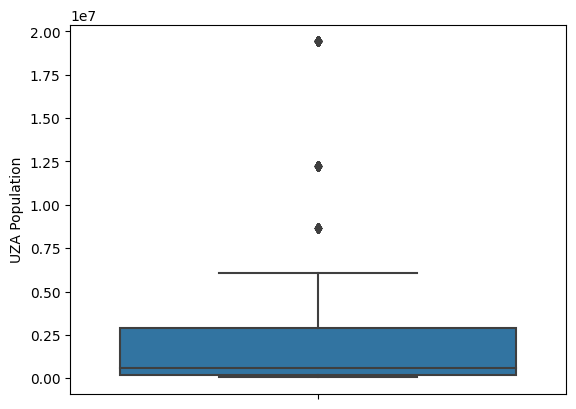

In [33]:
sns.boxplot(data=riders_map,y="UZA Population")

In [34]:
riders_map["UZA Population"].describe()


count    2.264000e+03
mean     2.662431e+06
std      4.657423e+06
min      5.072000e+04
25%      1.690470e+05
50%      5.658455e+05
75%      2.914866e+06
max      1.942645e+07
Name: UZA Population, dtype: float64

In [35]:
riders_map["UZA Population"].value_counts()

UZA Population
19426449.0    113
12237376.0     72
3515933.0      40
5100112.0      37
5732354.0      36
             ... 
120828.0        1
76433.0         1
61743.0         1
77187.0         1
70801.0         1
Name: count, Length: 381, dtype: int64

<Axes: xlabel='3 Mode'>

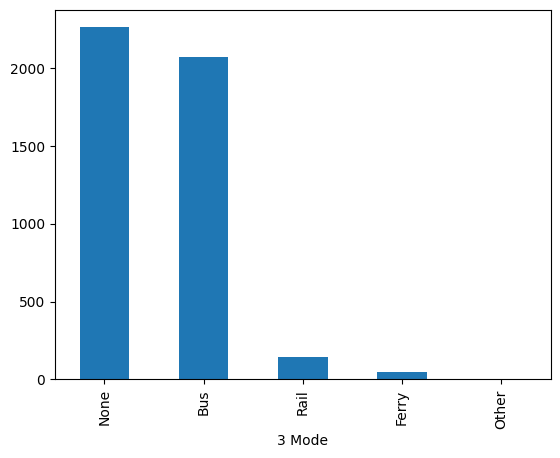

In [36]:
riders_map["3 Mode"].value_counts().plot(kind="bar")

In [37]:
riders_map["3 Mode"]=riders_map["3 Mode"].astype("category")
riders_map["3 Mode"].dtype

CategoricalDtype(categories=['Bus', 'Ferry', 'None', 'Other', 'Rail'], ordered=False, categories_dtype=object)

<Axes: xlabel='3 Mode'>

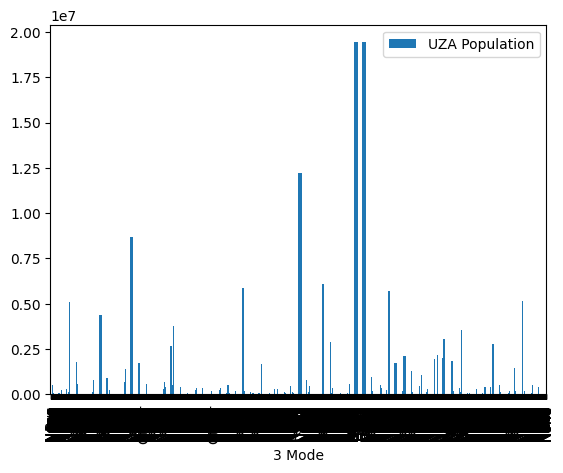

In [38]:
riders_map.plot(kind="bar",x="3 Mode", y = "UZA Population")

In [39]:
riders_map = riders_map.reset_index()

In [41]:
riders_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UACE20                       4526 non-null   float64 
 1   GEOID20                      4526 non-null   int64   
 2   GEOIDFQ20                    4526 non-null   object  
 3   NAME20                       4526 non-null   object  
 4   NAMELSAD20                   4526 non-null   object  
 5   LSAD20                       4526 non-null   object  
 6   MTFCC20                      4526 non-null   object  
 7   FUNCSTAT20                   4526 non-null   object  
 8   ALAND20                      4526 non-null   float64 
 9   AWATER20                     4526 non-null   float64 
 10  INTPTLAT20                   4526 non-null   float64 
 11  INTPTLON20                   4526 non-null   float64 
 12  geometry                     4526 non-null   geometry


In [42]:
(riders_map["UZA Population"]==np.inf).value_counts()

UZA Population
False    4526
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


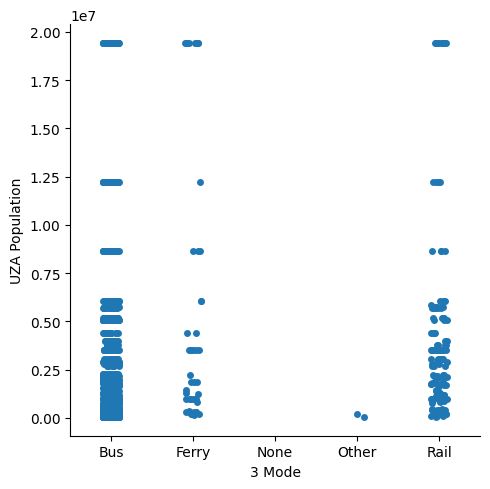

In [43]:
sns.catplot(x=riders_map["3 Mode"],y=riders_map["UZA Population"])

#### Surprisingly, there are Rail services for even low populations! Let's take a closer look at Urbanized Areas (cities) with Rail and low population. 

In [44]:
rail_cities = riders_map[riders_map["3 Mode"]=="Rail"]
rail_cities.head()

,UACE20,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NTD ID,Legacy NTD ID,Agency,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,HQ State,UZA Name,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
47,1171.0,1171,400C200US01171,"Albuquerque, NM","Albuquerque, NM Urban Area",67,G3500,S,6.813584e+08,6964860.0,35.131793,-106.623857,"MULTIPOLYGON (((-960476.321 -224533.181, -9609...",60111.0,6111,Rio Metro Regional Transit District,CR,PT,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,ALBUQUERQUE,NM,"Albuquerque, NM",263.07,769837.0,982474.0,990.0,2023.0,6.0,2023.0,26779026.0,545942.0,49.051046,936051.0,44384260.0,81.298490,1.714561
99,2305.0,2305,400C200US02305,"Anchorage, AK","Anchorage, AK Urban Area",67,G3500,S,2.375413e+08,2785839.0,61.169584,-149.854154,"MULTIPOLYGON (((-3082446.913 3462653.917, -308...",41.0,0041,Alaska Railroad Corporation,AR,DO,Rail,Active,Full Reporter,State Government Unit or Department of Transpo...,ANCHORAGE,AK,"Anchorage, AK",91.69,249252.0,352701.0,266.0,2023.0,12.0,2023.0,27930710.0,225434.0,123.897504,36125687.0,60628460.0,268.941065,160.249505
169,3817.0,3817,400C200US03817,"Atlanta, GA","Atlanta, GA Urban Area",67,G3500,S,6.612690e+09,99543987.0,33.834858,-84.337701,"MULTIPOLYGON (((1098719.199 -350107.869, 10986...",40022.0,4022,Metropolitan Atlanta Rapid Transit Authority,HR,DO,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,ATLANTA,GA,"Atlanta, GA",2553.04,5100112.0,1742072.0,605.0,2023.0,6.0,2023.0,213500276.0,30395534.0,7.024067,43621639.0,250901225.0,8.254542,1.435133
172,3817.0,3817,400C200US03817,"Atlanta, GA","Atlanta, GA Urban Area",67,G3500,S,6.612690e+09,99543987.0,33.834858,-84.337701,"MULTIPOLYGON (((1098719.199 -350107.869, 10986...",40022.0,4022,Metropolitan Atlanta Rapid Transit Authority,SR,DO,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,ATLANTA,GA,"Atlanta, GA",2553.04,5100112.0,1742072.0,605.0,2023.0,6.0,2023.0,99018.0,134786.0,0.734631,36662.0,5707120.0,42.342083,0.272002
199,3817.0,3817,400C200US03817,"Atlanta, GA","Atlanta, GA Urban Area",67,G3500,S,6.612690e+09,99543987.0,33.834858,-84.337701,"MULTIPOLYGON (((1098719.199 -350107.869, 10986...",40230.0,4230,City of Atlanta,SR,DO,Rail,Inactive,Full Reporter,"City, County or Local Government Unit or Depar...",Atlanta,GA,"Atlanta, GA",2553.04,5100112.0,486290.0,132.0,2018.0,6.0,2018.0,364699.0,387978.0,0.939999,160794.0,5589429.0,14.406562,0.414441


<Axes: >

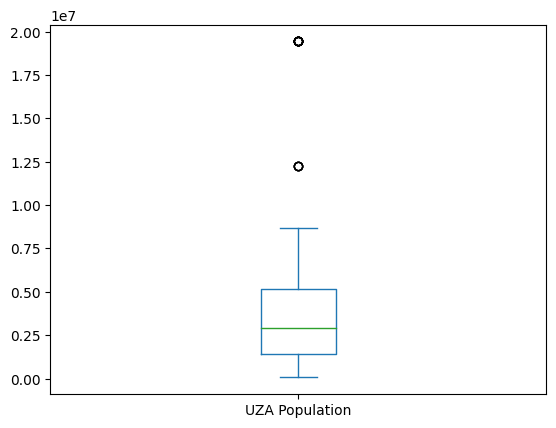

In [45]:
rail_cities["UZA Population"].plot(kind="box")

In [46]:
rail_cities[rail_cities["UZA Population"]>0.75e7]

,UACE20,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NTD ID,Legacy NTD ID,Agency,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,HQ State,UZA Name,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
723,16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50066.0,5066,Chicago Transit Authority,HR,DO,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,CHICAGO,IL,"Chicago, IL--IN",2337.89,8671746.0,3224925.0,283.0,2023.0,12.0,2023.0,6.868845e+08,1.174471e+08,5.848456,1.546779e+08,7.252968e+08,6.175517,1.317000
730,16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50104.0,5104,Northern Indiana Commuter Transportation District,CR,DO,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,CHESTERTON,IN,"Chicago, IL--IN",2337.89,8671746.0,1060840.0,1970.0,2023.0,12.0,2023.0,4.994194e+07,1.526836e+06,32.709434,9.450519e+06,6.157512e+07,40.328572,6.189610
738,16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50118.0,5118,Northeast Illinois Regional Commuter Railroad ...,CR,DO,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,CHICAGO,IL,"Chicago, IL--IN",2337.89,8671746.0,8615017.0,3947.0,2023.0,12.0,2023.0,2.960623e+08,1.374238e+07,21.543744,6.362915e+07,5.388081e+08,39.207765,4.630140
739,16264.0,16264,400C200US16264,"Chicago, IL--IN","Chicago, IL--IN Urban Area",67,G3500,S,6.055263e+09,100871831.0,41.830410,-87.908669,"MULTIPOLYGON (((640268.019 463247.287, 640299....",50118.0,5118,Northeast Illinois Regional Commuter Railroad ...,CR,PT,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,CHICAGO,IL,"Chicago, IL--IN",2337.89,8671746.0,8615017.0,3947.0,2023.0,12.0,2023.0,4.100433e+08,1.824570e+07,22.473428,8.535181e+07,3.578011e+08,19.610163,4.677915
2278,51445.0,51445,400C200US51445,"Los Angeles--Long Beach--Anaheim, CA","Los Angeles--Long Beach--Anaheim, CA Urban Area",67,G3500,S,4.242042e+09,45611507.0,33.984996,-118.122395,"MULTIPOLYGON (((-1994396.590 -141217.746, -199...",90151.0,9151,Southern California Regional Rail Authority,CR,DO,Rail,Inactive,Full Reporter,Independent Public Agency or Authority of Tran...,LOS ANGELES,CA,"Los Angeles--Long Beach--Anaheim, CA",1636.83,12237376.0,8341002.0,2291.0,2003.0,6.0,2003.0,2.746254e+08,7.397965e+06,37.121749,3.580275e+07,7.528696e+07,10.176712,4.839540
2279,51445.0,51445,400C200US51445,"Los Angeles--Long Beach--Anaheim, CA","Los Angeles--Long Beach--Anaheim, CA Urban Area",67,G3500,S,4.242042e+09,45611507.0,33.984996,-118.122395,"MULTIPOLYGON (((-1994396.590 -141217.746, -199...",90151.0,9151,Southern California Regional Rail Authority,CR,PT,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran...,LOS ANGELES,CA,"Los Angeles--Long Beach--Anaheim, CA",1636.83,12237376.0,8341002.0,2291.0,2023.0,6.0,2023.0,1.543816e+08,3.703404e+06,41.686415,3.432738e+07,2.783330e+08,75.155993,9.269144
2281,51445.0,51445,400C200US51445,"Los Angeles--Long Beach--Anaheim, CA","Los Angeles--Long Beach--Anaheim, CA Urban Area",67,G3500,S,4.242042e+09,45611507.0,33.984996,-118.122395,"MULTIPOLYGON (((-1994396.590 -141217.746, -199...",90154.0,9154,Los Angeles County Metropolitan Transportation...,HR,DO,Rail,Active,Full Reporter,Independent Public Agency or Authority of Tran..

#### I'm noticing that **Service Area Population** vs. **Service Area SQ Miles** may be a much better estimate of population density per line-item. 

<Axes: >

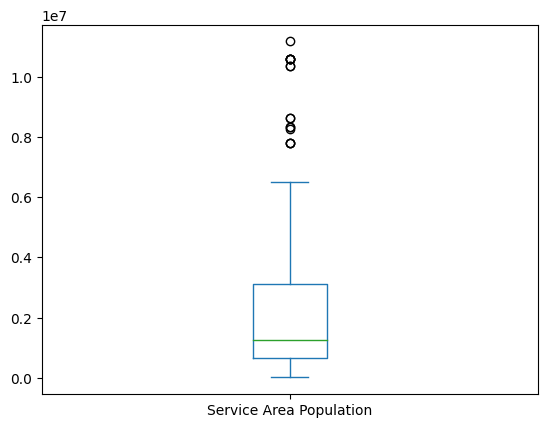

In [47]:
rail_cities["Service Area Population"].plot(kind="box")

<Axes: ylabel='Density'>

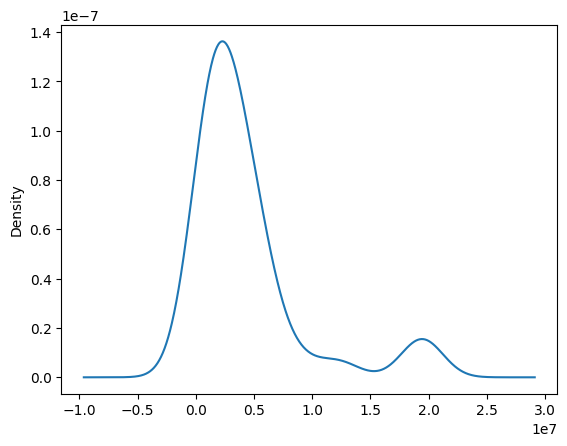

In [48]:
rail_cities["UZA Population"].plot(kind="kde")

<Axes: ylabel='Service Area Population'>

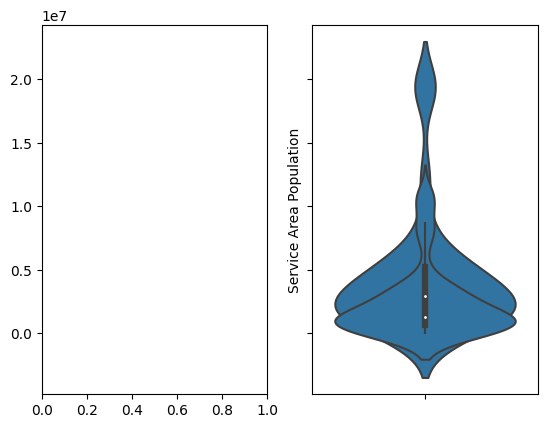

In [49]:
plt.subplots(ncols=2, sharey=True)
sns.violinplot(data=rail_cities, y="UZA Population" )
sns.violinplot(data=rail_cities, y="Service Area Population")

In [50]:
rail_cities.loc[rail_cities["Service Area Population"].idxmin()]

UACE20                                                                   43912.0
GEOID20                                                                    43912
GEOIDFQ20                                                         400C200US43912
NAME20                                                       Kansas City, MO--KS
NAMELSAD20                                        Kansas City, MO--KS Urban Area
LSAD20                                                                        67
MTFCC20                                                                    G3500
FUNCSTAT20                                                                     S
ALAND20                                                             1849557770.0
AWATER20                                                              21393182.0
INTPTLAT20                                                             39.041244
INTPTLON20                                                            -94.606359
geometry                    

#### The least-populated Service Area is Kansas City, MO. I wonder what other details we can find out about Kansas City?

In [51]:
riders_map[riders_map["NAME20"]=="Kansas City, MO--KS"]

,UACE20,GEOID20,GEOIDFQ20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,NTD ID,Legacy NTD ID,Agency,Mode,TOS,3 Mode,Mode/Type of Service Status,Reporter Type,Organization Type,HQ City,HQ State,UZA Name,UZA SQ Miles,UZA Population,Service Area Population,Service Area SQ Miles,Last Closed Report Year,Last Closed FY End Month,Last Closed FY End Year,Passenger Miles FY,Unlinked Passenger Trips FY,Avg Trip Length FY,Fares FY,Operating Expenses FY,Avg Cost Per Trip FY,Avg Fares Per Trip FY
1920,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Area",67,G3500,S,1.849558e+09,21393182.0,39.041244,-94.606359,"MULTIPOLYGON (((89074.286 147902.358, 89068.66...",70005.0,7005,Kansas City Area Transportation Authority,DR,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,KANSAS CITY,MO,"Kansas City, MO--KS",714.1,1674218.0,621956.0,459.0,2023.0,12.0,2023.0,227856.0,65726.0,3.466756,0.0,2895296.0,44.051000,0.000000
1921,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Area",67,G3500,S,1.849558e+09,21393182.0,39.041244,-94.606359,"MULTIPOLYGON (((89074.286 147902.358, 89068.66...",70005.0,7005,Kansas City Area Transportation Authority,DR,PT,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,KANSAS CITY,MO,"Kansas City, MO--KS",714.1,1674218.0,621956.0,459.0,2023.0,12.0,2023.0,591523.0,80662.0,7.333354,70752.0,5841363.0,72.417780,0.877142
1922,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Area",67,G3500,S,1.849558e+09,21393182.0,39.041244,-94.606359,"MULTIPOLYGON (((89074.286 147902.358, 89068.66...",70005.0,7005,Kansas City Area Transportation Authority,DR,TX,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,KANSAS CITY,MO,"Kansas City, MO--KS",714.1,1674218.0,621956.0,459.0,2023.0,12.0,2023.0,2797767.0,291732.0,9.590196,484419.0,13444093.0,46.083710,1.660493
1923,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Area",67,G3500,S,1.849558e+09,21393182.0,39.041244,-94.606359,"MULTIPOLYGON (((89074.286 147902.358, 89068.66...",70005.0,7005,Kansas City Area Transportation Authority,MB,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,KANSAS CITY,MO,"Kansas City, MO--KS",714.1,1674218.0,621956.0,459.0,2023.0,12.0,2023.0,36800284.0,10841740.0,3.394315,0.0,84183189.0,7.764730,0.000000
1924,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Area",67,G3500,S,1.849558e+09,21393182.0,39.041244,-94.606359,"MULTIPOLYGON (((89074.286 147902.358, 89068.66...",70005.0,7005,Kansas City Area Transportation Authority,RB,DO,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,KANSAS CITY,MO,"Kansas City, MO--KS",714.1,1674218.0,621956.0,459.0,2023.0,12.0,2023.0,2834912.0,943703.0,3.004030,0.0,5630589.0,5.966484,0.000000
1925,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Area",67,G3500,S,1.849558e+09,21393182.0,39.041244,-94.606359,"MULTIPOLYGON (((89074.286 147902.358, 89068.66...",70005.0,7005,Kansas City Area Transportation Authority,VP,DO,Bus,Inactive,Full Reporter,Independent Public Agency or Authority of Tran...,KANSAS CITY,MO,"Kansas City, MO--KS",714.1,1674218.0,621956.0,459.0,2017.0,12.0,2017.0,74256.0,1737.0,42.749568,12473.0,23354.0,13.445020,7.180771
1926,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Area",67,G3500,S,1.849558e+09,21393182.0,39.041244,-94.606359,"MULTIPOLYGON (((89074.286 147902.358, 89068.66...",70005.0,7005,Kansas City Area Transportation Authority,VP,PT,Bus,Active,Full Reporter,Independent Public Agency or Authority of Tran...,KANSAS CITY,MO,"Kansas City, MO--KS",714.1,1674218.0,621956.0,459.0,2023.0,12.0,2023.0,1823230.0,52361.0,34.820382,338320.0,751239.0,14.347300,6.461298
1927,43912.0,43912,400C200US43912,"Kansas City, MO--KS","Kansas City, MO--KS Urban Ar

# End
Allows user to navigate to the end of the document using Table of Contents links. 

In [52]:
import plotly.express as px

In [53]:
%config Completer.use_jedi = False

In [ ]:
px.